In [12]:
import os
import re
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# Define the error log file path
error_log_path = '/content/drive/MyDrive/w210/error_log.txt'

# Load the error log into a DataFrame
import pandas as pd

# Read the error log file into a list of lines
with open(error_log_path, 'r') as f:
    error_lines = f.readlines()

# Display the total number of errors
print(f"Total number of errors: {len(error_lines)}")

# Preview the first few lines
print("\nFirst 10 error log entries:")
print("".join(error_lines[:10]))

Total number of errors: 391

First 10 error log entries:
Error processing 000023.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000037.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000043.jpg for ela: image file is truncated (41 bytes not processed)
Error processing 000059.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000082.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000117.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000135.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000215.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000361.jpg for ela: cannot identify image file 'temp_ela.jpg'
Error processing 000410.jpg for ela: cannot identify image file 'temp_ela.jpg'



In [8]:
# Extract relevant details into a structured DataFrame
error_data = []

# Parse each error line
for line in error_lines:
    # Example log format: "Error processing 000001.jpg for hog: File not found\n"
    match = re.match(r"Error processing (\S+) for (\S+): (.+)", line)
    if match:
        img_file, feature_type, error_message = match.groups()
        error_data.append([img_file, feature_type, error_message])

# Create a DataFrame to analyze errors
error_df = pd.DataFrame(error_data, columns=['image', 'feature_type', 'error_message'])

# Display the first few rows
print("\nParsed Error Log DataFrame:")
print(error_df.head())



Parsed Error Log DataFrame:
        image feature_type                                     error_message
0  000023.jpg          ela         cannot identify image file 'temp_ela.jpg'
1  000037.jpg          ela         cannot identify image file 'temp_ela.jpg'
2  000043.jpg          ela  image file is truncated (41 bytes not processed)
3  000059.jpg          ela         cannot identify image file 'temp_ela.jpg'
4  000082.jpg          ela         cannot identify image file 'temp_ela.jpg'


In [9]:
feature_type_counts = error_df['feature_type'].value_counts()
print("\nError Counts by Feature Type:")
print(feature_type_counts)


Error Counts by Feature Type:
feature_type
ela    391
Name: count, dtype: int64


In [10]:
image_error_counts = error_df['image'].value_counts().head(10)
print("\nImages with the Most Errors:")
print(image_error_counts)


Images with the Most Errors:
image
000023.jpg    1
089349.jpg    1
061084.jpg    1
053880.jpg    1
143171.jpg    1
135884.jpg    1
025965.jpg    1
082613.jpg    1
150655.jpg    1
049584.jpg    1
Name: count, dtype: int64


In [11]:
error_message_counts = error_df['error_message'].value_counts().head(10)
print("\nMost Common Error Messages:")
print(error_message_counts)


Most Common Error Messages:
error_message
cannot identify image file 'temp_ela.jpg'           171
image file is truncated (41 bytes not processed)      9
image file is truncated (28 bytes not processed)      8
image file is truncated (11 bytes not processed)      6
broken data stream when reading image file            5
image file is truncated (30 bytes not processed)      5
image file is truncated (0 bytes not processed)       5
image file is truncated (42 bytes not processed)      5
image file is truncated (9 bytes not processed)       5
image file is truncated (8 bytes not processed)       5
Name: count, dtype: int64


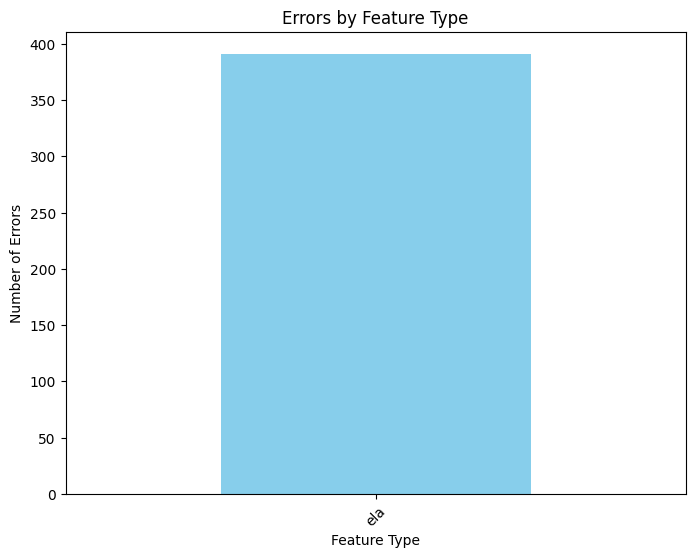

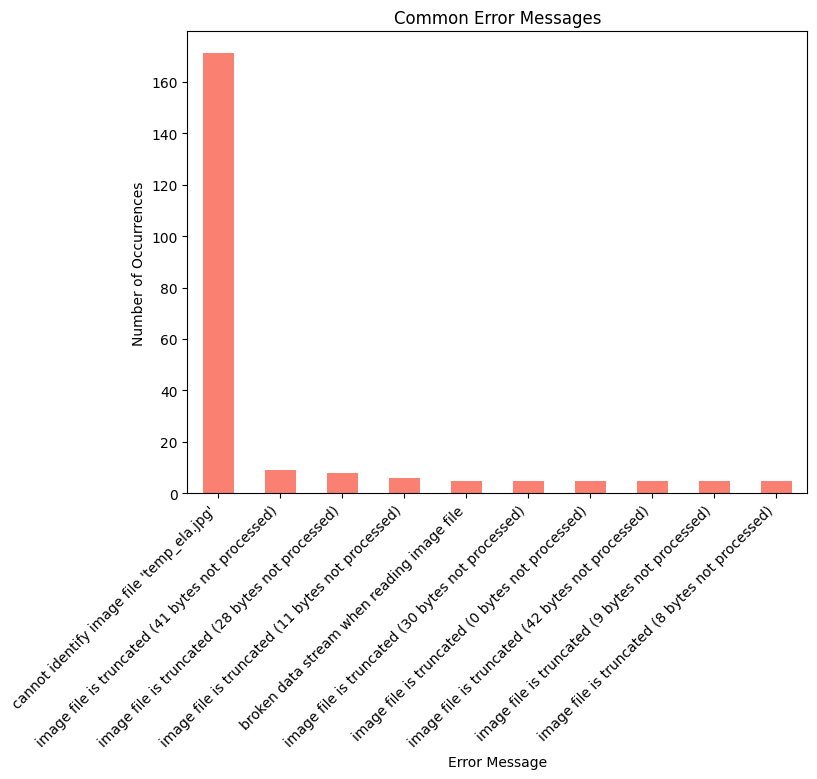

In [13]:
# Error count by feature type
plt.figure(figsize=(8, 6))
feature_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Feature Type')
plt.ylabel('Number of Errors')
plt.title('Errors by Feature Type')
plt.xticks(rotation=45)
plt.show()

# Common error messages
plt.figure(figsize=(8, 6))
error_message_counts.plot(kind='bar', color='salmon')
plt.xlabel('Error Message')
plt.ylabel('Number of Occurrences')
plt.title('Common Error Messages')
plt.xticks(rotation=45, ha='right')
plt.show()